In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import updater as db
%matplotlib inline

database_name = "PRICES_INTRADAY"
db_info, data_source_info = db.parse_creds(db.cred_file, database_name=database_name) # did you create creds.yaml?
sql_conn, sql_cursor = db.mysql_connect(
    host=db_info['host'],
    user=db_info['user'],
    password=db_info['password'],
    database=database_name)

In [2]:
# Pull static Data(Life Expectancy) from DB

query_string = """SELECT * FROM Life_Expectancy"""

DB_Static_data = pd.read_sql(query_string, con=sql_conn).assign(
    date=lambda x: pd.to_datetime(x.Year, format='%Y')).set_index('date').sort_index()


# To filter the data of country - United States of America
country = "United States of America"

include_us = DB_Static_data[DB_Static_data['Country'].values == country]
exclude_us = DB_Static_data[DB_Static_data['Country'].values != country]
us_life = include_us

In [9]:
# To show basic statistics (count, mean, minimum value, max value, std deviation, first quartile, second quartile and third quartile)
DB_Static_data.describe()

,ID,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIVAIDS,GDP,Population,thinness,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2530.000000,2530.000000,2520.000000,2520.000000,2530.000000,2340.000000,2530.000000,2164.000000,2530.000000,2500.000000,...,2517.000000,2314.000000,2517.000000,2530.000000,2153.000000,1.972000e+03,2500.000000,2500.000000,2397.000000,2401.000000
mean,1265.500000,2008.517787,69.714881,161.079365,28.256126,4.672201,785.247694,81.723198,2096.015020,39.114080,...,83.541518,5.995324,83.505364,1.628696,7962.510229,1.300862e+07,4.663200,4.702840,0.642304,12.212661
std,730.492414,4.033847,9.306992,120.659759,113.377184,4.072491,2083.153561,24.509400,10497.289383,20.176401,...,22.674241,2.553984,22.691888,4.763404,14897.980142,6.476138e+07,4.185141,4.273532,0.198774,3.234031
min,1.000000,2002.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,633.250000,2005.000000,63.875000,72.000000,0.000000,0.900000,4.701146,78.000000,0.000000,21.075000,...,79.000000,4.280000,81.000000,0.100000,513.391914,1.907480e+05,1.500000,1.500000,0.508000,10.300000
50%,1265.500000,2009.000000,72.400000,141.000000,3.000000,3.860000,72.211815,92.000000,12.000000,44.900000,...,93.000000,5.810000,93.000000,0.100000,2178.383250,1.378866e+06,3.300000,3.300000,0.688000,12.500000
75%,1897.750000,2012.000000,75.825000,225.000000,19.000000,7.910000,488.441100,97.000000,270.750000,56.900000,...,97.000000,7.570000,97.000000,0.700000,6519.717530,7.391118e+06,7.000000,7.100000,0.784000,14.400000
max,2530.000000,2015.000000,89.000000,723.000000,1700.000000,17.870000,19479.911610,99.000000,182485.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.400000,28.400000,0.948000,20.700000


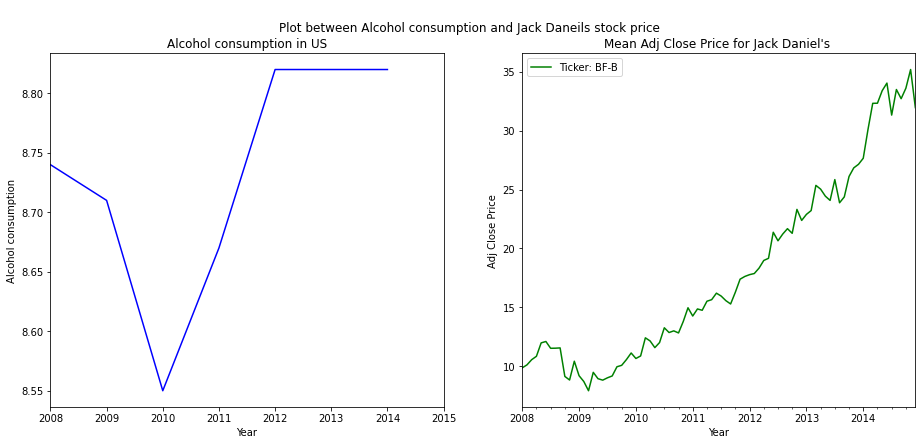

In [11]:
# To display plot between Alcohol consumption and Jack Daneils stock price


from matplotlib.ticker import FormatStrFormatter
import matplotlib 
import matplotlib.dates as mdates

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('\nPlot between Alcohol consumption and Jack Daneils stock price')
fig.set_size_inches(15.5, 6.5)


# Get Static data from table . CSV data inserted into DB table through PHPmyadmin.            
us_life['2008-01-01':'2015-01-01'].Alcohol.plot(ax=ax1, color='blue' ,xlabel = 'Year', 
                                                ylabel = 'Alcohol consumption', title= "Alcohol consumption in US", label = 'US Alcohol Consumption')


# Get dynamic data from table . Python script written to pull data from Alpha Vantage API and inserted into DB tabel
ticker = 'BF-B'
hhll_length = 40
dynamic_alcohol_security_data = pd.read_sql('CALL GetSecurityData("{}")'.format(ticker), con=sql_conn).set_index("SampleTime").sort_index()
dynamic_alcohol_security_data['2008-01-01' : '2015-01-01'].AdjustedClosePrice.resample('M').mean().plot(ax=ax2, color='green', xlabel = 'Year', ylabel = 'Adj Close Price',
                                                                              title= "Mean Adj Close Price for Jack Daniel's ", label = 'Ticker: BF-B')

plt.legend()
plt.show()

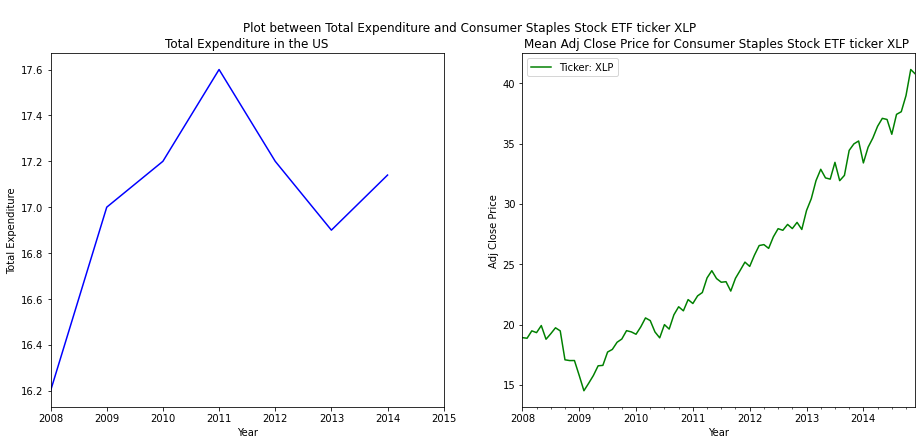

In [4]:
# To display Plot between Total Expenditure and Consumer Staples Stock ETF ticker XLP


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('\nPlot between Total Expenditure and Consumer Staples Stock ETF ticker XLP')
fig.set_size_inches(15.5, 6.5)


# Get Static data from table . CSV data inserted into DB table.            
us_life['2008-01-01':'2015-01-01'].Total_expenditure.plot(ax=ax1, color='blue' ,xlabel = 'Year', ylabel = 'Total Expenditure', title= "Total Expenditure in the US")


# Get dynamic data from table . Python script written to pull data from Alpha Vantage API and inserted into DB tabel
symbol = 'XLP'
hhll_length = 40
dynamic_alcohol_security_data = pd.read_sql('CALL GetSecurityData("{}")'.format(symbol), con=sql_conn).set_index("SampleTime").sort_index()
dynamic_alcohol_security_data['2008-01-01' : '2015-01-01'].AdjustedClosePrice.resample('M').mean().plot(ax=ax2, color='green', xlabel = 'Year', ylabel = 'Adj Close Price',
                                                                              title= "Mean Adj Close Price for Consumer Staples Stock ETF ticker XLP ", label = 'Ticker: XLP')

plt.legend()
plt.show()



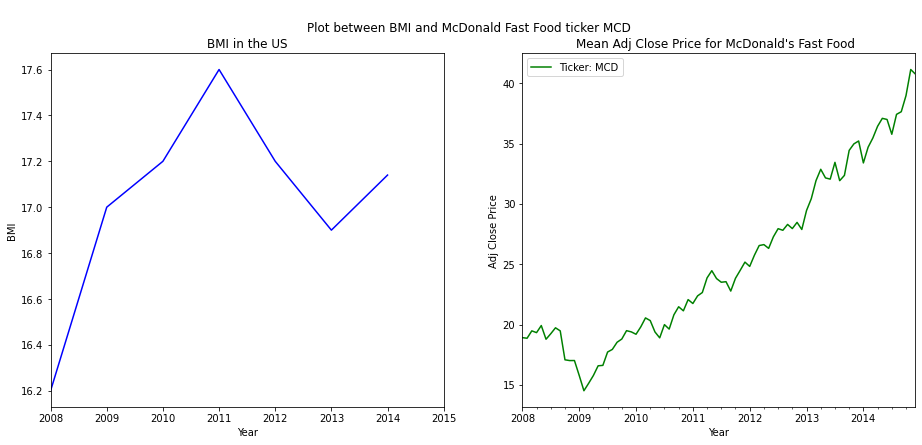

In [5]:
# To display plot between BMI and McDonald Fast Food ticker MCD


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('\nPlot between BMI and McDonald Fast Food ticker MCD')
fig.set_size_inches(15.5, 6.5)


# Get Static data from table . CSV data inserted into DB table.            
us_life['2008-01-01':'2015-01-01'].Total_expenditure.plot(ax=ax1, color='blue' ,xlabel = 'Year', ylabel = 'BMI', title= "BMI in the US")


# Get dynamic data from table . Python script written to pull data from Alpha Vantage API and inserted into DB tabel
symbol = 'XLP'
hhll_length = 40
dynamic_alcohol_security_data = pd.read_sql('CALL GetSecurityData("{}")'.format(symbol), con=sql_conn).set_index("SampleTime").sort_index()
dynamic_alcohol_security_data['2008-01-01' : '2015-01-01'].AdjustedClosePrice.resample('M').mean().plot(ax=ax2, color='green', xlabel = 'Year', ylabel = 'Adj Close Price',
                                                                              title= "Mean Adj Close Price for McDonald's Fast Food  ", label = 'Ticker: MCD')

plt.legend()
plt.show()
